## Initialization

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

import os, sys, pandas as pd

sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation/')
sys.path.append('../../../')

import hts_fitting as hts, hts_showcase as sc, seaborn as sns, hts_fitfunctions as ff
from uncertainties import ufloat
from scipy import constants, optimize
from scipy.interpolate import interp1d
import default_style

def linear_norm(x, a):
    return a*x+1
    
savedir = '/Users/alexisdevitre/Documents/GitHub/2025-devitre-PhD/chapter 6/figures/raw/'

## Plot

[-0.01639251]
[-0.02991299]
[-0.02876956]


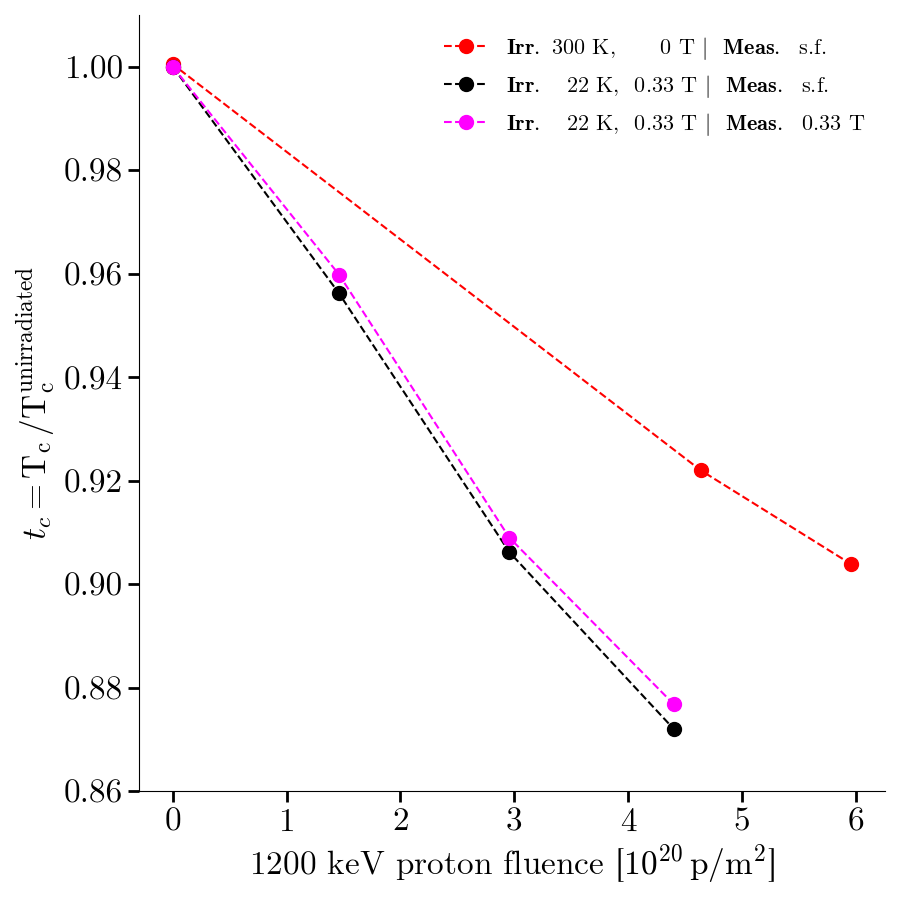

In [6]:
fig, ax = plt.subplots()
ax.set_ylim(.86, 1.01)
ax.set_xlabel(r'1200 keV proton fluence [$\mathrm{10^{20}\, p/m^2}$]')
ax.set_ylabel(r'$t_c \mathrm{= T_c \, / T_c^{unirradiated}}$')

fpaths = [
    '../../../chapter 5/data/output/300k_ffj26-tc_degradation.xlsx',
    '../output/ext_ffj51-tc_degradation.xlsx',
    '../output/ext_ffj51-tc_degradation.xlsx'
]

labels = [
    r'$\mathbf{Irr.}$ 300 K,      0 T |  $\mathbf{Meas.}$  s.f.', 
    r'$\mathbf{Irr.}$   22 K,  0.33 T |  $\mathbf{Meas.}$  s.f.',
    r'$\mathbf{Irr.}$   22 K,  0.33 T |  $\mathbf{Meas.}$  0.33 T',
    
]
r'$\mathbf{Irr.}$   22 K, 0.33 T |'

for fpath, c, l, magnet in zip(fpaths, ['r', 'k', 'magenta'], labels, [False, False, True]):
    data = pd.read_excel(fpath)
    
    if 'magnet' in data.columns:
        data = data[data.magnet == magnet]
        
    tc0 = data[data.cumulated_fluence == 0].tc.values[0]
    
    ax.plot(data.cumulated_fluence/1e20, data.tc/tc0, marker='o', linestyle='--', color=c, label=l)

    icpopt, _ = optimize.curve_fit(linear_norm, np.array(data.cumulated_fluence)/1e20, data.tc/tc0)
    xsmooth = np.arange(0, data.cumulated_fluence.max()/1e20+1, 1)
    ysmooth = linear_norm(xsmooth, *icpopt)
    #ax.plot(xsmooth, ysmooth, color=c, zorder=0, linewidth=4, alpha=.3, solid_capstyle='round')
    print(icpopt)
    
fig.tight_layout()
ax.legend(loc='upper right', frameon=False)
#fig.savefig(savedir+r'tc_field_nofield.svg', format='svg', dpi=300, transparent=True)